In [1]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version
# opencv is pre-installed on colab
# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html


Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.5 (from versions: 1.11.0, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1, 2.1.2, 2.2.0, 2.2.1)
ERROR: No matching distribution found for torch==1.5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 2.1 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-br3i9ohb
  Running command git clone --filter=blob:

In [2]:

#downloading and unziping the coco dataset
!mkdir COCO
%cd COCO
!mkdir images
%cd images

!wget http://images.cocodataset.org/zips/train2017.zip
!unzip train2017.zip
!rm train2017.zip

!wget http://images.cocodataset.org/zips/val2017.zip
!unzip val2017.zip
!rm val2017.zip

%cd ..
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip annotations_trainval2017.zip
!rm annotations_trainval2017.zip

!wget http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip
!unzip stuff_annotations_trainval2017.zip
!rm stuff_annotations_trainval2017.zip


Streaming output truncated to the last 5000 lines.
 extracting: val2017/000000428280.jpg  
 extracting: val2017/000000209222.jpg  
 extracting: val2017/000000353051.jpg  
 extracting: val2017/000000191471.jpg  
 extracting: val2017/000000539962.jpg  
 extracting: val2017/000000462371.jpg  
 extracting: val2017/000000574315.jpg  
 extracting: val2017/000000005037.jpg  
 extracting: val2017/000000083540.jpg  
 extracting: val2017/000000145665.jpg  
 extracting: val2017/000000174231.jpg  
 extracting: val2017/000000389812.jpg  
 extracting: val2017/000000245513.jpg  
 extracting: val2017/000000122046.jpg  
 extracting: val2017/000000143931.jpg  
 extracting: val2017/000000555005.jpg  
 extracting: val2017/000000142472.jpg  
 extracting: val2017/000000246883.jpg  
 extracting: val2017/000000459272.jpg  
 extracting: val2017/000000356261.jpg  
 extracting: val2017/000000169996.jpg  
 extracting: val2017/000000311909.jpg  
 extracting: val2017/000000253433.jpg  
 extracting: val2017/00000039

In [2]:
!git clone https://github.com/facebookresearch/detectron2.git
!pip install -e detectron2

Cloning into 'detectron2'...
remote: Enumerating objects: 15508, done.
remote: Counting objects: 100% (233/233), done.
remote: Compressing objects: 100% (194/194), done.
remote: Total 15508 (delta 66), reused 177 (delta 39), pack-reused 15275
Receiving objects: 100% (15508/15508), 6.39 MiB | 15.79 MiB/s, done.
Resolving deltas: 100% (11177/11177), done.
Obtaining file:///content/detectron2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.2/426.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... d

In [1]:

#You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
import math
import os
from google.colab.patches import cv2_imshow
from PIL import Image

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.serialize import PicklableWrapper
from detectron2.data import MetadataCatalog


In [2]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("train", {}, "/content/COCO/annotations/instances_train2017.json", "/content/COCO/images/train2017")
register_coco_instances("val", {}, "/content/COCO/annotations/instances_val2017.json", "/content/COCO/images/val2017")

In [4]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 8
cfg.SOLVER.BASE_LR = 0.0003
cfg.SOLVER.MAX_ITER = 10
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 80

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[03/19 13:53:49 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

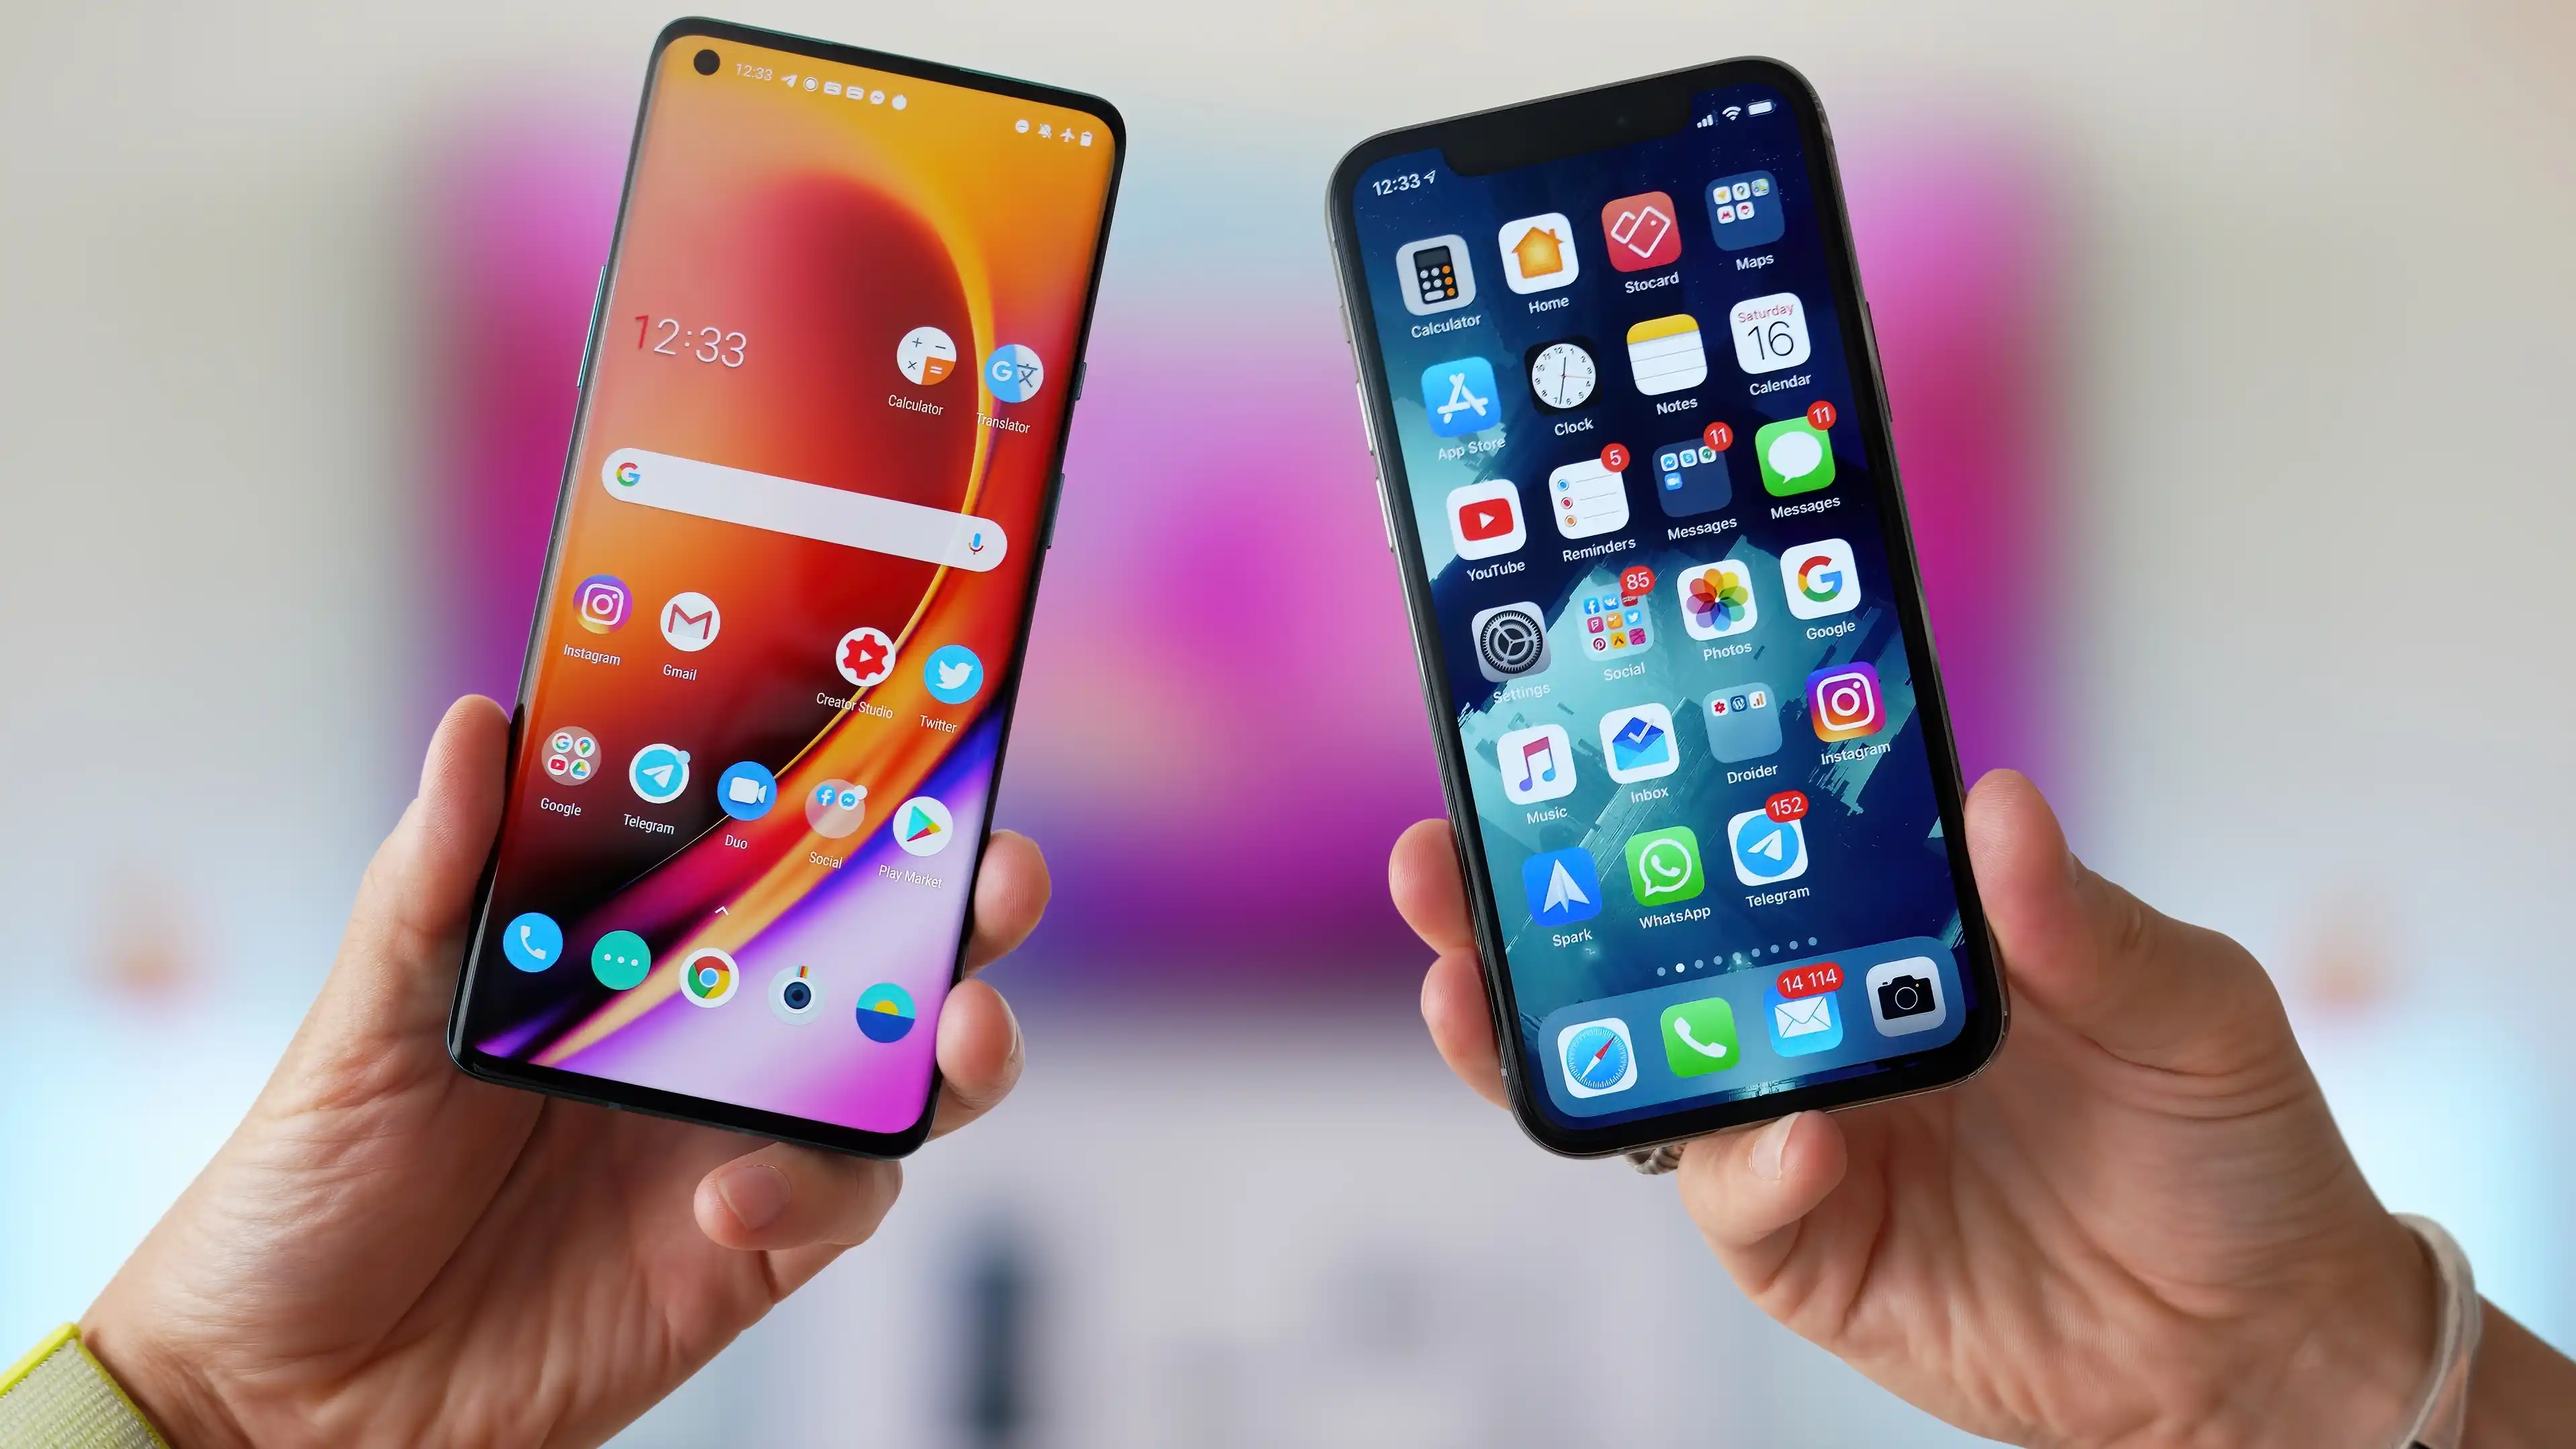

In [6]:

im = cv2.imread("sample.webp")
cv2_imshow(im)

[03/19 13:56:09 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


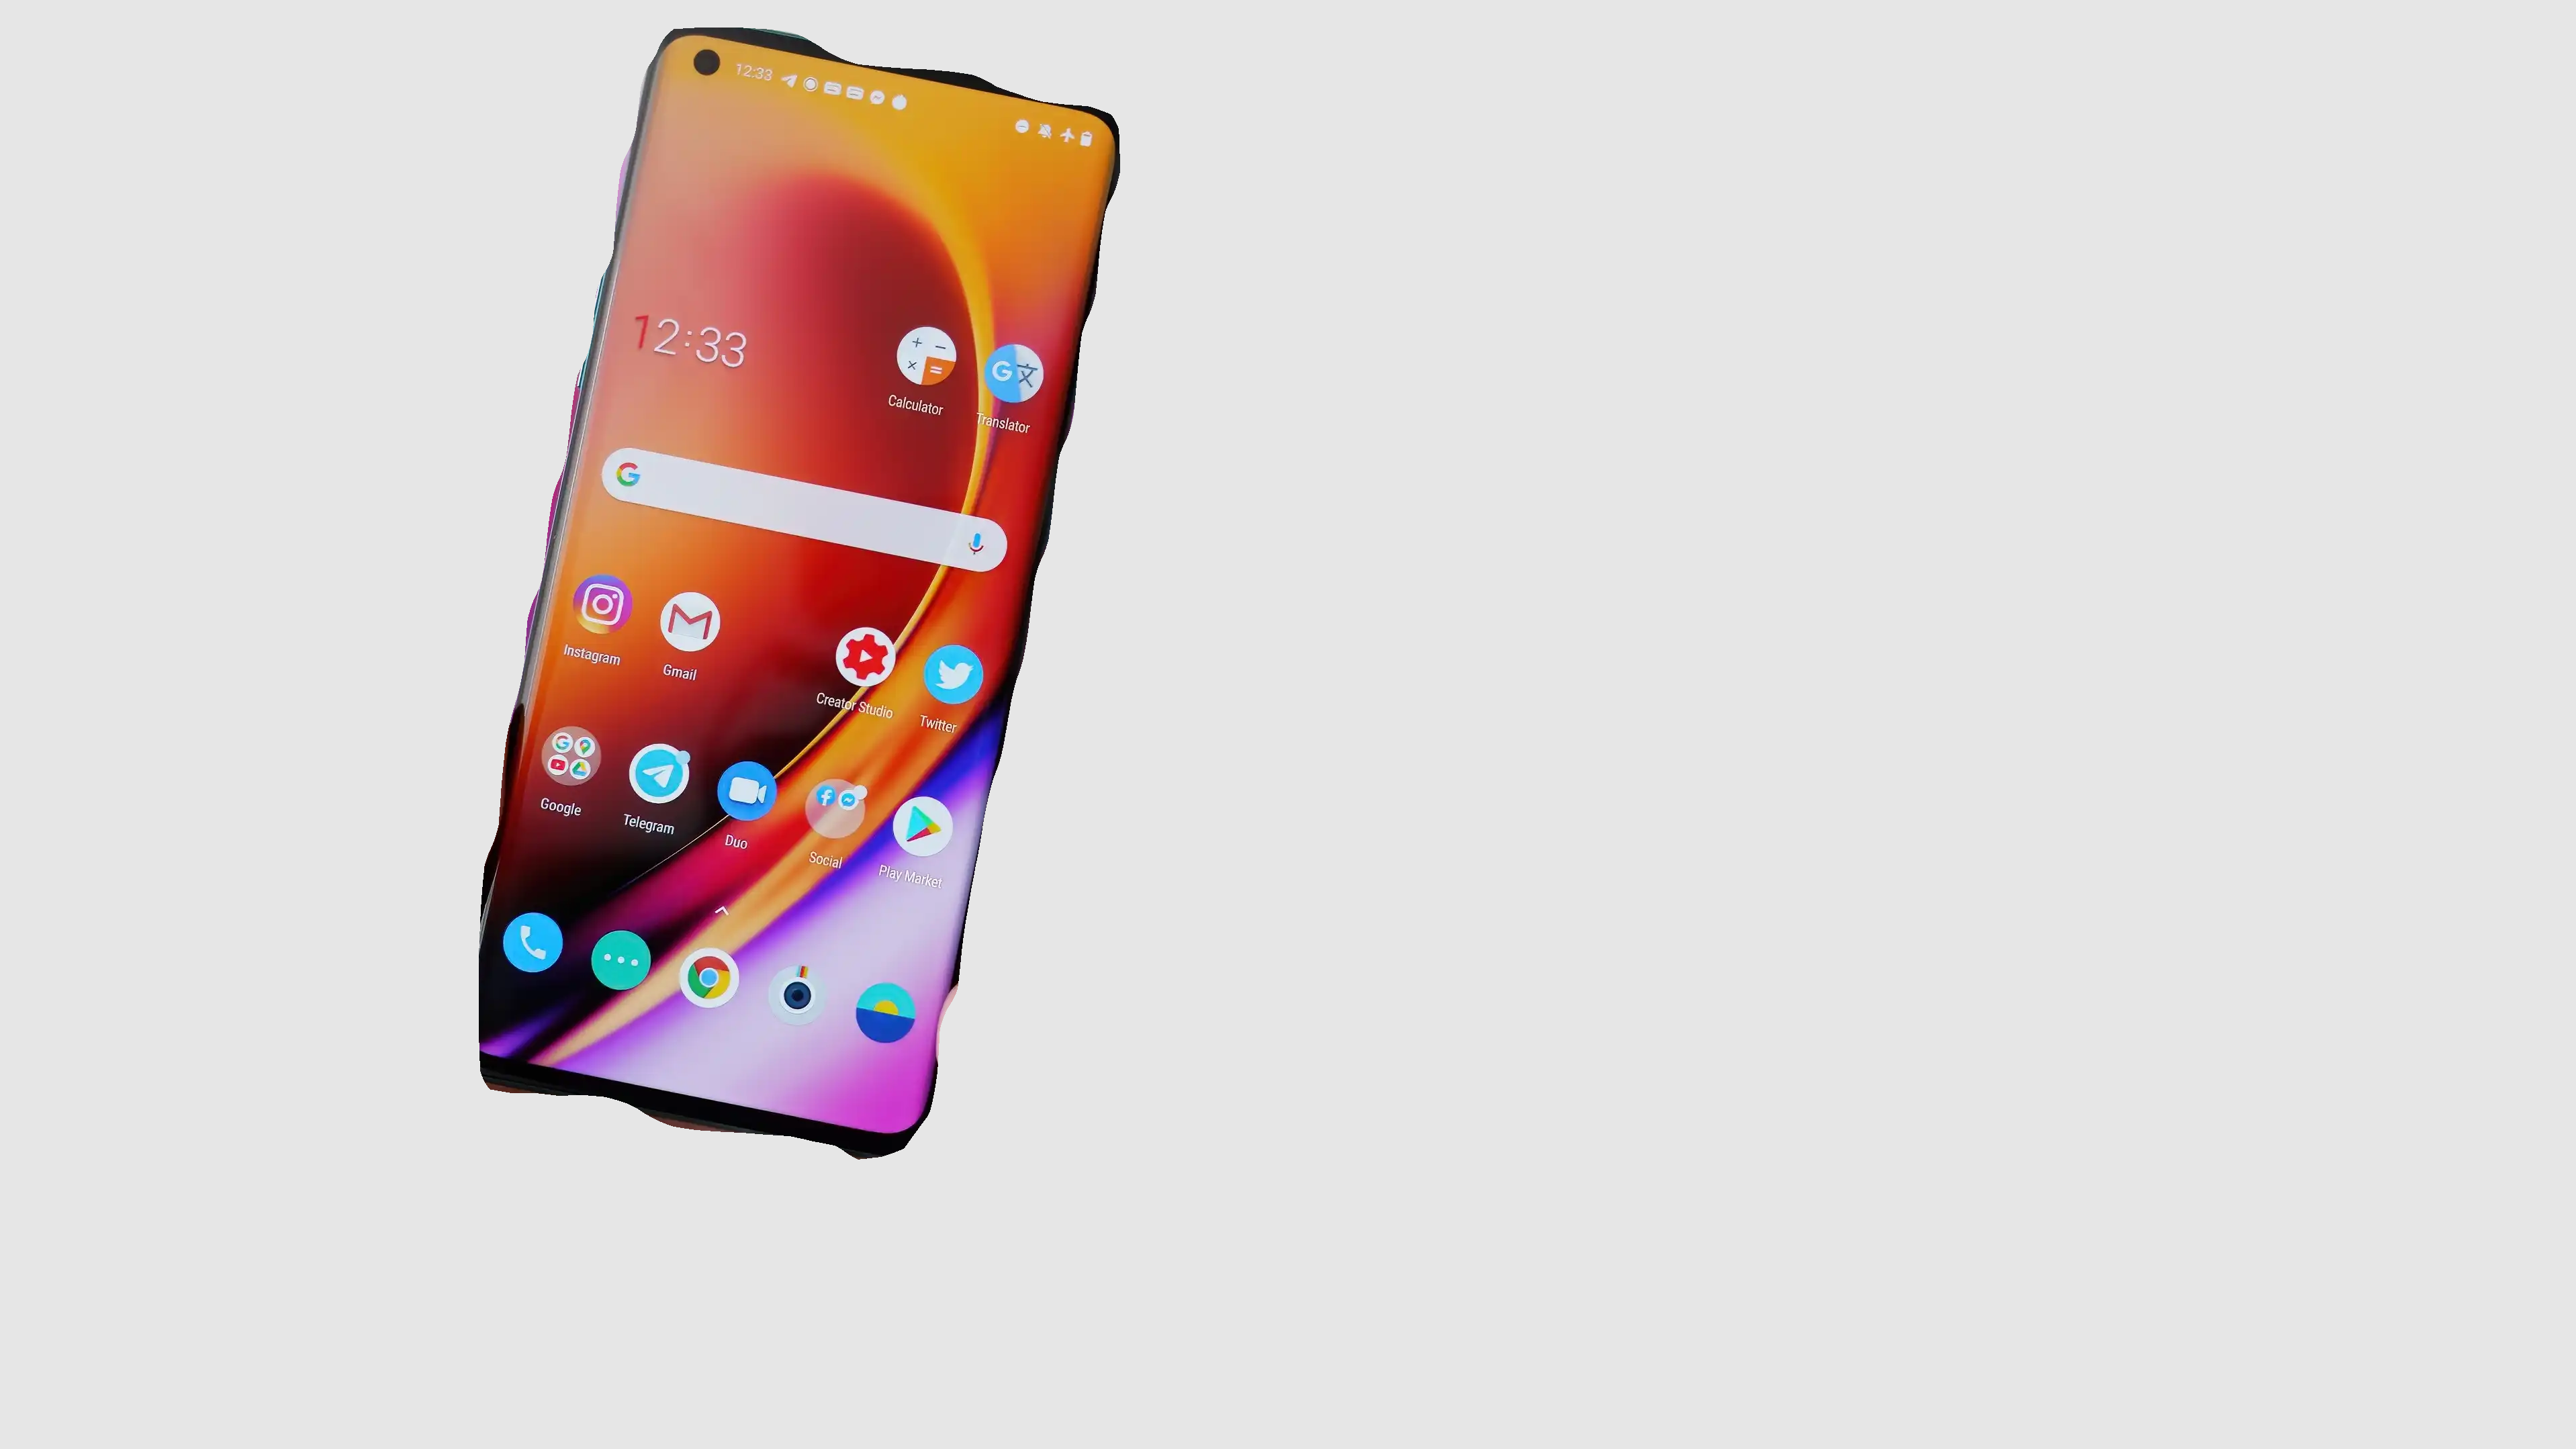

In [7]:
# load weights
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
# Set training data-set path
cfg.DATASETS.TEST = ("val", )
# Create predictor (model for inference)
predictor = DefaultPredictor(cfg)
outputs = predictor(im)
mask = outputs["instances"].pred_masks
i = len(mask[0][0])
j = len(mask[0])
test = im
for j1 in range(j):
  for i1 in range(i):
    if(outputs["instances"].pred_masks[0][j1][i1] == False):
      test[j1,i1] = 230
cv2_imshow(test)

In [8]:
import os
import h5py
import numpy as np

# Load weights
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
# Set testing threshold
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7
# Set testing dataset path
cfg.DATASETS.TEST = ("val", )
# Create predictor
predictor = DefaultPredictor(cfg)

# Perform inference and store predicted masks
outputs = predictor(im)
masks = outputs["instances"].pred_masks.cpu().numpy()

# Create an HDF5 file and store masks
with h5py.File("predicted_masks.h5", "w") as hf:
    hf.create_dataset("masks", data=masks)


[03/19 14:07:39 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...
